@author: [s16496@pjwstk.edu.pl](mailto:s16496@pjwstk.edu.pl)

Pobieram potrzebne mi biblioteki NumPy - do operacji na tablicach, Pandas - do analizy i czyszczenia danych, Sklearn - do machine learningu oraz plotly express, matplotlib i seaborn do wizualizacji

In [33]:
import plotly
import plotly.express as px
import numpy as np
import pandas as pd

Pobieram i obrabiam dane

In [34]:
appsttore_data = pd.read_csv('drive/MyDrive/store.csv')
appsttore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4447388,67,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1,Subway Surfers,GAME,4.5,27722264,76,1.000000e+09,Free,0.0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
2,Candy Crush Saga,GAME,4.4,22426677,74,5.000000e+08,Free,0.0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
3,Solitaire,GAME,4.7,254258,23,1.000000e+07,Free,0.0,Everyone,Card,1-Aug-18,2.137.0,4.1 and up
4,Bubble Shooter,GAME,4.5,148897,46,1.000000e+07,Free,0.0,Everyone,Casual,17-Jul-18,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,Winter Wonderland,GAME,4.0,1287,38,5.000000e+04,Free,0.0,Everyone,Word,18-Dec-13,1,2.2 and up
1140,Soccer Clubs Logo Quiz,GAME,4.2,21661,16,1.000000e+06,Free,0.0,Everyone,Trivia,24-May-18,1.3.81,4.0 and up
1141,Sid Story,GAME,4.4,28510,78,5.000000e+05,Free,0.0,Teen,Card,1-Aug-18,2.6.6,4.0.3 and up
1142,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81,1.000000e+06,Free,0.0,Teen,Action,7-Aug-18,1.5.447,4.0 and up


In [35]:
appsttore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1144 non-null   object 
 1   Category        1144 non-null   object 
 2   Rating          1097 non-null   float64
 3   Reviews         1144 non-null   int64  
 4   Size            1015 non-null   object 
 5   Installs        1144 non-null   float64
 6   Type            1144 non-null   object 
 7   Price           1144 non-null   float64
 8   Content Rating  1144 non-null   object 
 9   Genres          1144 non-null   object 
 10  Last Updated    1144 non-null   object 
 11  Current Ver     1144 non-null   object 
 12  Android Ver     1144 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 116.3+ KB


In [36]:
px.scatter_matrix(data_frame=appsttore_data, dimensions=['Rating', 'Reviews','Installs', 'Price'],
                  color='Type', title='Scatter Matrix - app')

Spawdzam ile się spodziewać opini w stosunku do ilości instalacji

In [37]:
appsttore_data = appsttore_data[['Reviews', 'Installs']]
appsttore_data

,Reviews,Installs
0,4447388,1.000000e+08
1,27722264,1.000000e+09
2,22426677,5.000000e+08
3,254258,1.000000e+07
4,148897,1.000000e+07
...,...,...
1139,1287,5.000000e+04
1140,21661,1.000000e+06
1141,28510,5.000000e+05
1142,56496,1.000000e+06


In [38]:
appsttore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviews   1144 non-null   int64  
 1   Installs  1144 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 18.0 KB


Dziele wszystko przez 1000 żeby otrzymać dane w tysiącach

In [39]:
appsttore_data = appsttore_data.div(10000)
appsttore_data

,Reviews,Installs
0,444.7388,10000.0
1,2772.2264,100000.0
2,2242.6677,50000.0
3,25.4258,1000.0
4,14.8897,1000.0
...,...,...
1139,0.1287,5.0
1140,2.1661,100.0
1141,2.8510,50.0
1142,5.6496,100.0


In [40]:
appsttore_data.astype('int64').dtypes

Reviews     int64
Installs    int64
dtype: object

Tworze zbiór testowy i treningowy

In [41]:
from sklearn.model_selection import train_test_split
appsttore_data_train, appsttore_data_test = train_test_split(appsttore_data, test_size=1000)

In [42]:
appsttore_data_test

,Reviews,Installs
362,21.3340,1000.0
186,0.9394,10.0
729,124.3017,5000.0
14,377.8921,10000.0
424,0.3250,100.0
...,...,...
215,2.6247,100.0
825,24.8417,500.0
916,0.0450,1.0
633,0.3845,50.0


In [43]:
appsttore_data_train

,Reviews,Installs
947,0.2218,50.0
634,0.0141,1.0
172,18.7972,500.0
694,0.0001,0.1
769,14.2308,500.0
...,...,...
122,1.5763,100.0
982,0.3946,10.0
192,271.9142,1000.0
149,54.1144,1000.0


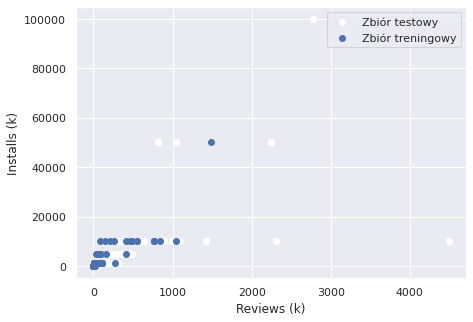

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(appsttore_data_test.Reviews, appsttore_data_test.Installs, c='w', label='Zbiór testowy')
plt.scatter(appsttore_data_train.Reviews, appsttore_data_train.Installs, c='b', label='Zbiór treningowy')
plt.xlabel('Reviews (k)')
plt.ylabel('Installs (k)')
plt.legend()

Stosuje regresję i oceniam model

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(appsttore_data_train.Reviews.values.reshape(-1, 1), appsttore_data_train.Installs)

lin_reg.score(appsttore_data_train.Reviews.values.reshape(-1, 1), appsttore_data_train.Installs)

0.7374386200022174